## Extracting Chess Squares with Square Filling Algorithm ( image --> fen format)

<br>
<font size="4">
Notebook version of square_filling.py file. You can use this file for testing 
</font>
<br><br><br><br>

<br>

## Necessary Libraries

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import  math


In [9]:
def sort_quadrilateral_approx(approx):
    '''
    returns (bottomright(1), topright(2) , topleft(3) , bottomleft(4))
    '''

    # create same pattern for points , bottomright(1) , topright(2) , topleft(3) , bottomleft(4)
    index_sorted = sorted(approx, key=lambda x: x[0], reverse=True)
    #  Y values
    if index_sorted[0][1]< index_sorted[1][1]:
        index_sorted[0], index_sorted[1] = index_sorted[1], index_sorted[0]

    if index_sorted[2][1]> index_sorted[3][1]:
        index_sorted[2], index_sorted[3] = index_sorted[3], index_sorted[2]

    # bottomright(1) , topright(2) , topleft(3) , bottomleft(4)
    return (index_sorted[0], index_sorted[1], index_sorted[2], index_sorted[3])

In [44]:
image_path =  r"E:\projects\uni\Chessy3D\data\chessred\images\0\G000_IMG004.jpg"
# image_path = r"C:\Users\Alessandro\Downloads\Immagine WhatsApp 2025-06-01 ore 22.59.14_ef4809cb.jpg"
# image_path = r"C:\Users\Alessandro\Downloads\Immagine WhatsApp 2025-06-01 ore 22.59.14_5b4da136.jpg"
# image_path = r"C:\Users\Alessandro\Downloads\Dynamic-Chess-Board-Piece-Extraction-master\Dynamic-Chess-Board-Piece-Extraction-master\test-images\test-8.jpeg"
# image_path = r"C:\Users\Alessandro\Downloads\Dynamic-Chess-Board-Piece-Extraction-master\Dynamic-Chess-Board-Piece-Extraction-master\test-images\test-15.jpeg"


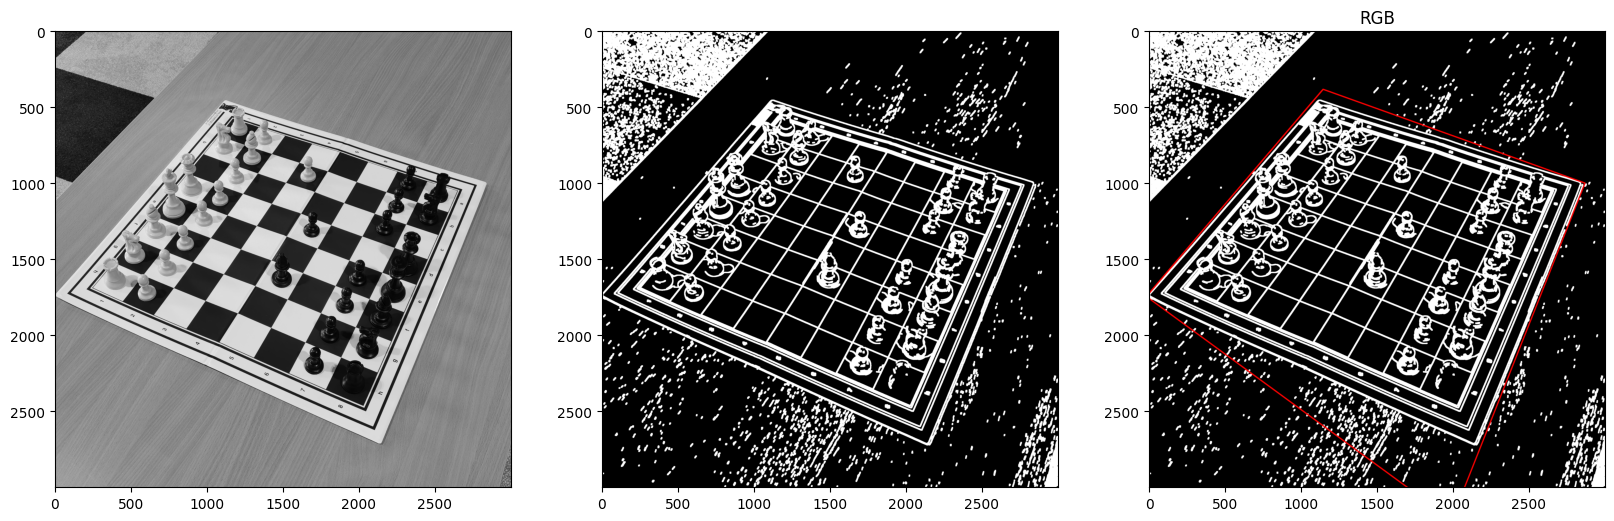

In [48]:
# Path of Image that you want to convert

# read image and convert it to different color spaces
image = cv2.imread(image_path)
resized = cv2.resize(image, (3000, 3000))

original_size = image.shape[0]
resized_size = 3000
parameters_original_size = 1000
upsize_factor = resized_size / original_size
scale_factor = resized_size / parameters_original_size

gray_image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
blur_sigma = math.sqrt((upsize_factor // 2)*(5**2))
blurred_image = cv2.GaussianBlur(gray_image, (5,5),blur_sigma)
# blurred_image = cv2.bilateralFilter(blurred_image,9,75,75)

thresh, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# canny_image = cv2.Canny(blurred_image, ret * 1.5, ret * 0.75 * 1.5)
canny_image = cv2.Canny(blurred_image, thresh, thresh * 0.5)
canny_image = cv2.dilate(canny_image, np.ones((5,5)), iterations=2)
# canny_image = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, np.ones((5,5)), iterations=1)

board_contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(output_image, board_contours, -1, (255, 0, 0), 2)

# next, previous, child contour, parent contour
ext_board_contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def process_contours(index, hierarchy, cnts):
    output = []
    while index != -1:
        contour = cnts[index]
        area = cv2.contourArea(contour)
        # print(f"{index} {area}")

        # original 2_000_000
        if 1_000_000 < area < 4_000_000:
            output.append((index,contour))

        child_index = hierarchy[index][2]
        if child_index != -1:
            output += process_contours(child_index, hierarchy, cnts)  # Process children first
        index = hierarchy[index][0]  # Move to the next contour

    return output

no_parent_contours = [x for x in enumerate(hierarchy[0]) if x[1][3] == -1]
for i, _ in no_parent_contours:
    output = process_contours(i, hierarchy[0], ext_board_contours)

    for i,cnt in output:
        approx = cv2.approxPolyN(cnt, 4, True)
        if approx.shape[0] != 1:
            continue
        approx = approx[0]

        (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx([pt for pt in approx])
        cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
        cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
        cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
        cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(output_image[:,:,::-1])
plt.title("RGB");

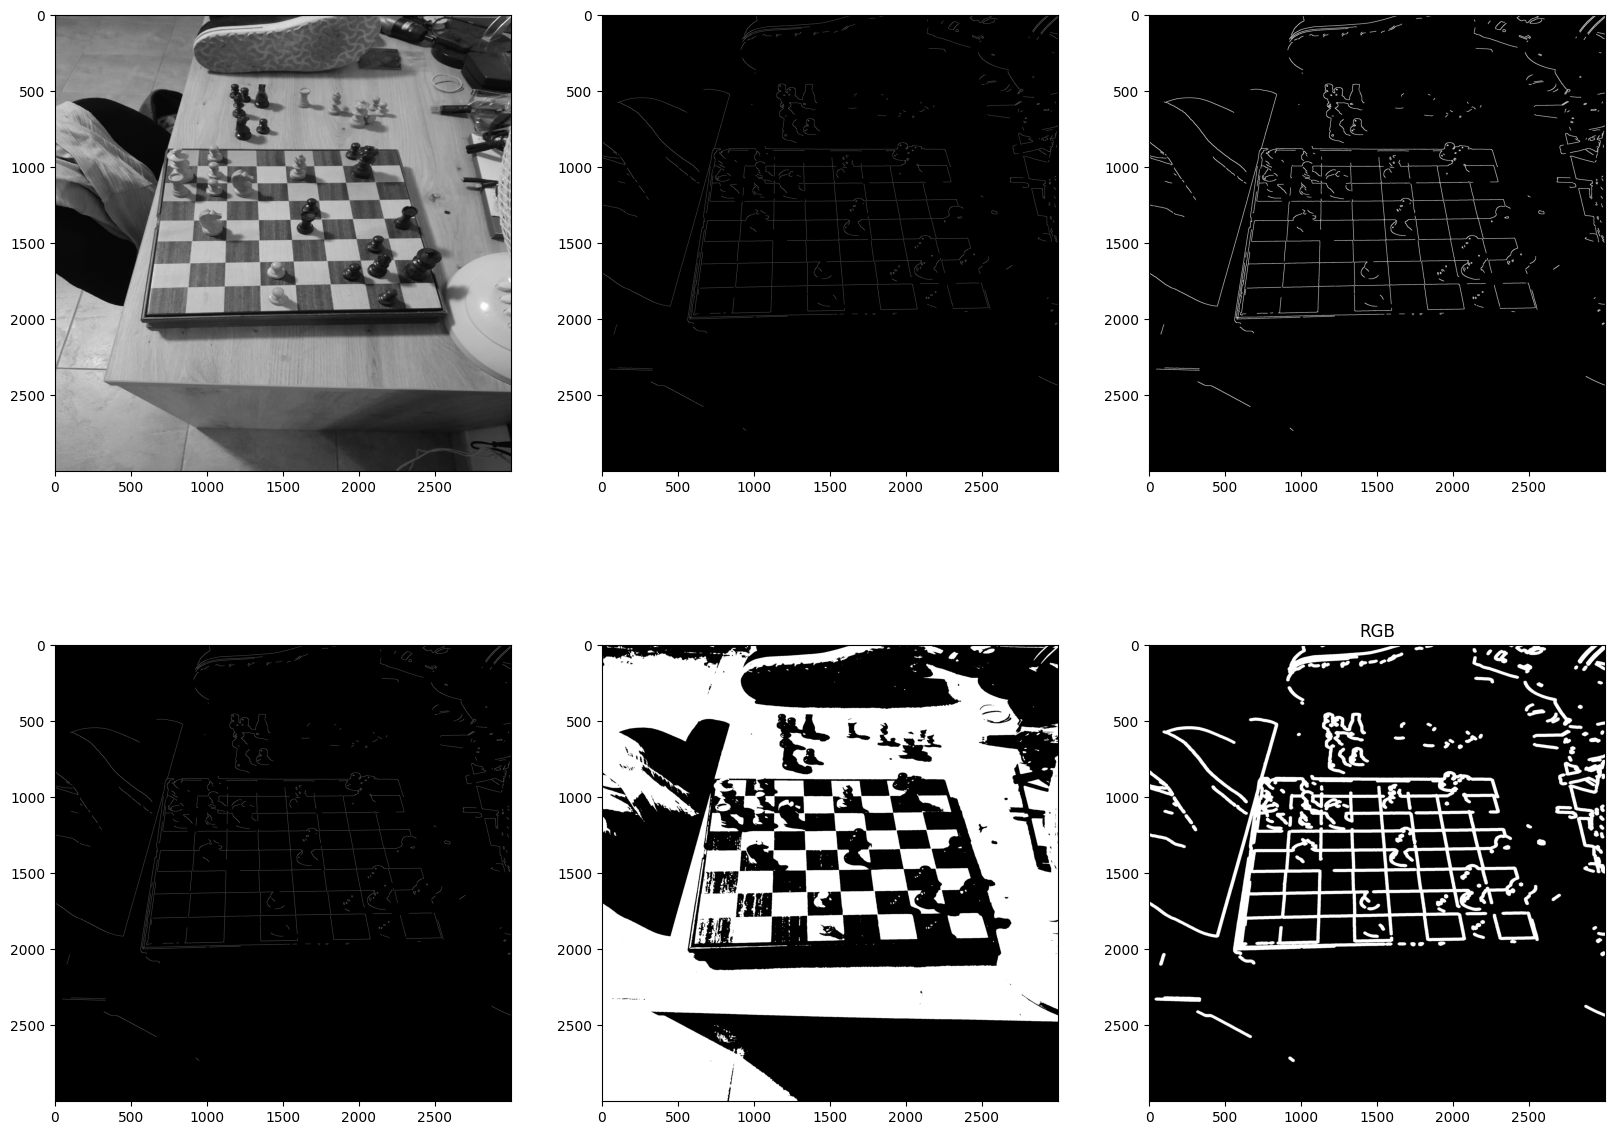

In [34]:

# read image and convert it to different color spaces
image = cv2.imread(image_path)
resized = cv2.resize(image, (3000, 3000))

original_size = image.shape[0]
resized_size = 3000
parameters_original_size = 1000
upsize_factor = resized_size / original_size
scale_factor = resized_size / parameters_original_size

gray_image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
blur_sigma = math.sqrt((upsize_factor // 2)*(5**2))
blurred_image = cv2.GaussianBlur(gray_image, (5,5),blur_sigma)
blurred_image = cv2.bilateralFilter(blurred_image,9,75,75)

thresh, otsu_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# canny_image = cv2.Canny(blurred_image, ret * 1.5, ret * 0.75 * 1.5)
canny_image = cv2.Canny(blurred_image, thresh, thresh * 0.75)
# canny_image = cv2.dilate(canny_image, np.ones((5,5)), iterations=3)
# canny_image = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, np.ones((5,5)), iterations=1)

ddepth = cv2.CV_16S
kernel_size = 3
laplacian_image = cv2.Laplacian(canny_image, ddepth, ksize=kernel_size)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

structure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
test_image = cv2.morphologyEx(canny_image, cv2.MORPH_DILATE, structure, iterations=5)

board_contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(output_image, board_contours, -1, (255, 0, 0), 2)

# next, previous, child contour, parent contour
ext_board_contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# def process_contours(index, hierarchy, cnts):
#     output = []
#     while index != -1:
#         contour = cnts[index]
#         area = cv2.contourArea(contour)
#         print(f"{index} {area}")

#         # original 2_000_000
#         if 1_000_000 < area < 4_000_000:
#             output.append((index,contour))

#         child_index = hierarchy[index][2]
#         if child_index != -1:
#             output += process_contours(child_index, hierarchy, cnts)  # Process children first
#         index = hierarchy[index][0]  # Move to the next contour

#     return output

# no_parent_contours = [x for x in enumerate(hierarchy[0]) if x[1][3] == -1]
# for i, _ in no_parent_contours:
#     output = process_contours(i, hierarchy[0], ext_board_contours)
#     print("interesting", len([x[0] for x in output]))

#     # cv2.drawContours(output_image, [x[1] for x in output], -1, (255,0,255), 3)

#     for i,cnt in output:
#         approx = cv2.approxPolyN(cnt, 4, True)
#         if approx.shape[0] != 1:
#             continue
#         approx = approx[0]

#         (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx([pt for pt in approx])
#         cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#         cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#         cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#         cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

# for contour in board_contours:
#     if 4000*scale_factor < cv2.contourArea(contour) < 20000*scale_factor:
#         # Approximate the contour to a simpler shape
#         epsilon = 0.01 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         if len(approx) == 4:
#             # 4 points of polygon

#             pts = [pt[0].tolist() for pt in approx]
#             (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx(pts)

#             # find rectangle that fits 4 point
#             x, y, w, h = cv2.boundingRect(contour)

#             # find center of rectangle
#             center_x=(x+(x+w))/2
#             center_y=(y+(y+h))/2

#             # calculate length of 4 side of rectangle
#             l1 = math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
#             l2 = math.sqrt((pt2[0] - pt3[0])**2 + (pt2[1] - pt3[1])**2)
#             l3 = math.sqrt((pt3[0] - pt4[0])**2 + (pt3[1] - pt4[1])**2)
#             l4 = math.sqrt((pt1[0] - pt4[0])**2 + (pt1[1] - pt4[1])**2)

#             # Create a list of lengths
#             lengths = [l1, l2, l3, l4]

#             # Get the maximum and minimum lengths
#             max_length = max(lengths)
#             min_length = min(lengths)

#             # Check if this length values are suitable for a square , this threshold value plays crucial role for squares ,
#             if (max_length - min_length) <= 50 * scale_factor: # 20 for smaller boards  , 50 for bigger , 35 works most of the time
#                 valid_square=True
#             else:
#                 valid_square=False

#             if valid_square:
#                 pass
#                 # cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(laplacian_image, cmap="gray")
plt.subplot(2, 3, 4)
plt.imshow(output_image[:,:,::-1])
plt.subplot(2, 3, 5)
plt.imshow(otsu_image, cmap="gray")
plt.subplot(2, 3, 6)
plt.imshow(test_image, cmap="gray")
plt.title("RGB");

In [ ]:

# read image and convert it to different color spaces
image = cv2.imread(image_path)
resized = cv2.resize(image, (3000, 3000))

original_size = image.shape[0]


In [ ]:
resized_size = 3000
parameters_original_size = 1000
upsize_factor = resized_size / original_size
scale_factor = resized_size / parameters_original_size

gray_image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
blur_sigma = math.sqrt((upsize_factor // 2)*(5**2))
blurred_image = cv2.GaussianBlur(gray_image, (5,5),blur_sigma)
blurred_image = cv2.bilateralFilter(blurred_image,9,75,75)

thresh, otsu_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# canny_image = cv2.Canny(blurred_image, ret * 1.5, ret * 0.75 * 1.5)
canny_image = cv2.Canny(blurred_image, thresh, thresh * 0.75)
# canny_image = cv2.dilate(canny_image, np.ones((5,5)), iterations=3)
# canny_image = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, np.ones((5,5)), iterations=1)

ddepth = cv2.CV_16S
kernel_size = 3
laplacian_image = cv2.Laplacian(canny_image, ddepth, ksize=kernel_size)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

structure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
test_image = cv2.morphologyEx(canny_image, cv2.MORPH_DILATE, structure, iterations=5)

board_contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(output_image, board_contours, -1, (255, 0, 0), 2)

# next, previous, child contour, parent contour
ext_board_contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# def process_contours(index, hierarchy, cnts):
#     output = []
#     while index != -1:
#         contour = cnts[index]
#         area = cv2.contourArea(contour)
#         print(f"{index} {area}")

#         # original 2_000_000
#         if 1_000_000 < area < 4_000_000:
#             output.append((index,contour))

#         child_index = hierarchy[index][2]
#         if child_index != -1:
#             output += process_contours(child_index, hierarchy, cnts)  # Process children first
#         index = hierarchy[index][0]  # Move to the next contour

#     return output

# no_parent_contours = [x for x in enumerate(hierarchy[0]) if x[1][3] == -1]
# for i, _ in no_parent_contours:
#     output = process_contours(i, hierarchy[0], ext_board_contours)
#     print("interesting", len([x[0] for x in output]))

#     # cv2.drawContours(output_image, [x[1] for x in output], -1, (255,0,255), 3)

#     for i,cnt in output:
#         approx = cv2.approxPolyN(cnt, 4, True)
#         if approx.shape[0] != 1:
#             continue
#         approx = approx[0]

#         (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx([pt for pt in approx])
#         cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#         cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#         cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#         cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

# for contour in board_contours:
#     if 4000*scale_factor < cv2.contourArea(contour) < 20000*scale_factor:
#         # Approximate the contour to a simpler shape
#         epsilon = 0.01 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         if len(approx) == 4:
#             # 4 points of polygon

#             pts = [pt[0].tolist() for pt in approx]
#             (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx(pts)

#             # find rectangle that fits 4 point
#             x, y, w, h = cv2.boundingRect(contour)

#             # find center of rectangle
#             center_x=(x+(x+w))/2
#             center_y=(y+(y+h))/2

#             # calculate length of 4 side of rectangle
#             l1 = math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
#             l2 = math.sqrt((pt2[0] - pt3[0])**2 + (pt2[1] - pt3[1])**2)
#             l3 = math.sqrt((pt3[0] - pt4[0])**2 + (pt3[1] - pt4[1])**2)
#             l4 = math.sqrt((pt1[0] - pt4[0])**2 + (pt1[1] - pt4[1])**2)

#             # Create a list of lengths
#             lengths = [l1, l2, l3, l4]

#             # Get the maximum and minimum lengths
#             max_length = max(lengths)
#             min_length = min(lengths)

#             # Check if this length values are suitable for a square , this threshold value plays crucial role for squares ,
#             if (max_length - min_length) <= 50 * scale_factor: # 20 for smaller boards  , 50 for bigger , 35 works most of the time
#                 valid_square=True
#             else:
#                 valid_square=False

#             if valid_square:
#                 pass
#                 # cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(laplacian_image, cmap="gray")
plt.subplot(2, 3, 4)
plt.imshow(output_image[:,:,::-1])
plt.subplot(2, 3, 5)
plt.imshow(otsu_image, cmap="gray")
plt.subplot(2, 3, 6)
plt.imshow(test_image, cmap="gray")
plt.title("RGB");

In [ ]:
resized_size = 3000
parameters_original_size = 1000
upsize_factor = resized_size / original_size
scale_factor = resized_size / parameters_original_size

gray_image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
blur_sigma = math.sqrt((upsize_factor // 2)*(5**2))
blurred_image = cv2.GaussianBlur(gray_image, (5,5),blur_sigma)
blurred_image = cv2.bilateralFilter(blurred_image,9,75,75)

thresh, otsu_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# canny_image = cv2.Canny(blurred_image, ret * 1.5, ret * 0.75 * 1.5)
canny_image = cv2.Canny(blurred_image, thresh, thresh * 0.75)
# canny_image = cv2.dilate(canny_image, np.ones((5,5)), iterations=3)
# canny_image = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, np.ones((5,5)), iterations=1)

ddepth = cv2.CV_16S
kernel_size = 3
laplacian_image = cv2.Laplacian(canny_image, ddepth, ksize=kernel_size)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

structure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
test_image = cv2.morphologyEx(canny_image, cv2.MORPH_DILATE, structure, iterations=5)

board_contours, _ = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)
#cv2.drawContours(output_image, board_contours, -1, (255, 0, 0), 2)

# next, previous, child contour, parent contour
ext_board_contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# def process_contours(index, hierarchy, cnts):
#     output = []
#     while index != -1:
#         contour = cnts[index]
#         area = cv2.contourArea(contour)
#         print(f"{index} {area}")

#         # original 2_000_000
#         if 1_000_000 < area < 4_000_000:
#             output.append((index,contour))

#         child_index = hierarchy[index][2]
#         if child_index != -1:
#             output += process_contours(child_index, hierarchy, cnts)  # Process children first
#         index = hierarchy[index][0]  # Move to the next contour

#     return output

# no_parent_contours = [x for x in enumerate(hierarchy[0]) if x[1][3] == -1]
# for i, _ in no_parent_contours:
#     output = process_contours(i, hierarchy[0], ext_board_contours)
#     print("interesting", len([x[0] for x in output]))

#     # cv2.drawContours(output_image, [x[1] for x in output], -1, (255,0,255), 3)

#     for i,cnt in output:
#         approx = cv2.approxPolyN(cnt, 4, True)
#         if approx.shape[0] != 1:
#             continue
#         approx = approx[0]

#         (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx([pt for pt in approx])
#         cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#         cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#         cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#         cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

# for contour in board_contours:
#     if 4000*scale_factor < cv2.contourArea(contour) < 20000*scale_factor:
#         # Approximate the contour to a simpler shape
#         epsilon = 0.01 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         if len(approx) == 4:
#             # 4 points of polygon

#             pts = [pt[0].tolist() for pt in approx]
#             (pt1, pt2, pt3, pt4) = sort_quadrilateral_approx(pts)

#             # find rectangle that fits 4 point
#             x, y, w, h = cv2.boundingRect(contour)

#             # find center of rectangle
#             center_x=(x+(x+w))/2
#             center_y=(y+(y+h))/2

#             # calculate length of 4 side of rectangle
#             l1 = math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
#             l2 = math.sqrt((pt2[0] - pt3[0])**2 + (pt2[1] - pt3[1])**2)
#             l3 = math.sqrt((pt3[0] - pt4[0])**2 + (pt3[1] - pt4[1])**2)
#             l4 = math.sqrt((pt1[0] - pt4[0])**2 + (pt1[1] - pt4[1])**2)

#             # Create a list of lengths
#             lengths = [l1, l2, l3, l4]

#             # Get the maximum and minimum lengths
#             max_length = max(lengths)
#             min_length = min(lengths)

#             # Check if this length values are suitable for a square , this threshold value plays crucial role for squares ,
#             if (max_length - min_length) <= 50 * scale_factor: # 20 for smaller boards  , 50 for bigger , 35 works most of the time
#                 valid_square=True
#             else:
#                 valid_square=False

#             if valid_square:
#                 pass
#                 # cv2.line(output_image, pt1, pt2, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt2, pt3, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt3, pt4, (0, 0, 255), 7)
#                 # cv2.line(output_image, pt1, pt4, (0, 0, 255), 7)

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2, 3, 2)
plt.imshow(canny_image, cmap="gray")
plt.subplot(2, 3, 3)
plt.imshow(laplacian_image, cmap="gray")
plt.subplot(2, 3, 4)
plt.imshow(output_image[:,:,::-1])
plt.subplot(2, 3, 5)
plt.imshow(otsu_image, cmap="gray")
plt.subplot(2, 3, 6)
plt.imshow(test_image, cmap="gray")
plt.title("RGB");

(1600, 1200) (1600, 1200)


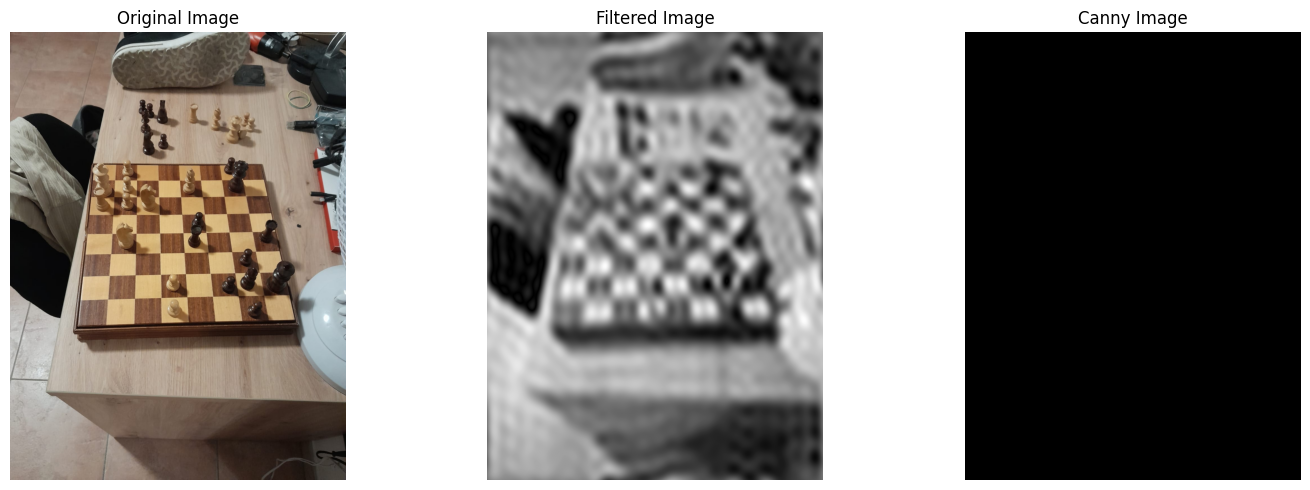

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fourier_transform_filter(image, low_freq_threshold=10):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Apply Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_shift = np.fft.fftshift(f_transform)

    # Create a mask for low frequencies
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2  # center of the frequency domain
    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.rectangle(mask, (ccol - low_freq_threshold, crow - low_freq_threshold),
                  (ccol + low_freq_threshold, crow + low_freq_threshold), 1, -1)

    # Apply the mask and inverse Fourier Transform
    filtered_f_shift = f_shift * mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_f_shift))
    filtered_image = np.abs(filtered_image)

    return filtered_image.astype(np.uint8)

# Load an image
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# Replace with your image path

# Apply Fourier Transform filtering
filtered_image = fourier_transform_filter(gray_image, low_freq_threshold=20)
print(filtered_image.shape, gray_image.shape)
canny_image = cv2.Canny(filtered_image, 400, 200)

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Canny Image")
plt.imshow(canny_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


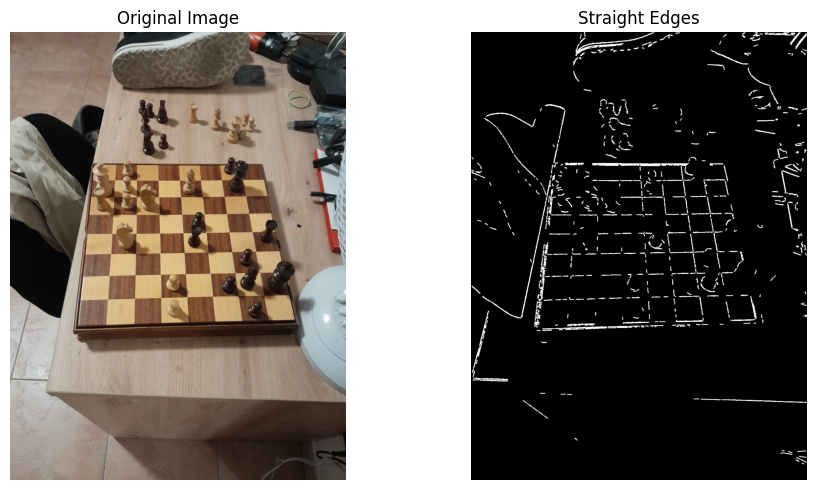

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def directional_gradient_analysis(image, angle_tolerance=10, min_edge_length=50):
    """
    Detect straight edges using directional gradient analysis.

    Parameters:
        image: Input image (grayscale or BGR).
        angle_tolerance: Maximum angular deviation (in degrees) for edges to be considered straight.
        min_edge_length: Minimum length of edges to be kept.

    Returns:
        straight_edges: Binary image with detected straight edges.
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Compute gradients in x and y directions
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude and direction
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    angle = np.arctan2(grad_y, grad_x) * (180 / np.pi)  # Convert to degrees
    angle[angle < 0] += 180  # Normalize to [0, 180]

    # Threshold the magnitude to identify strong edges
    magnitude_threshold = np.max(magnitude) * 0.2  # Adjust as needed
    edge_mask = magnitude > magnitude_threshold

    # Analyze gradient direction consistency
    straight_mask = np.zeros_like(gray_image, dtype=np.uint8)
    for i in range(1, gray_image.shape[0] - 1):
        for j in range(1, gray_image.shape[1] - 1):
            if edge_mask[i, j]:
                # Check local angle consistency
                local_angles = angle[i-1:i+2, j-1:j+2].flatten()
                angle_variation = np.ptp(local_angles)  # Peak-to-peak difference
                if angle_variation < angle_tolerance:
                    straight_mask[i, j] = 255

    # Remove small edges using morphology or connected components
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    straight_mask = cv2.dilate(straight_mask, kernel, iterations=1)
    contours, _ = cv2.findContours(straight_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_mask = np.zeros_like(straight_mask)
    for cnt in contours:
        if cv2.arcLength(cnt, closed=False) > min_edge_length:
            cv2.drawContours(filtered_mask, [cnt], -1, 255, thickness=cv2.FILLED)

    return filtered_mask

# Load an image
image = cv2.imread(image_path)  # Replace with your image path

# Apply directional gradient analysis
straight_edges = directional_gradient_analysis(image, angle_tolerance=25, min_edge_length=20)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Straight Edges")
plt.imshow(straight_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


e:\projects\uni\Chessy3D\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
e:\projects\uni\Chessy3D\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
e:\projects\uni\Chessy3D\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
e:\projects\uni\Chessy3D\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
e:\projects\uni\Chessy3D\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:1324: RuntimeWarning: divide by zero encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
e:\projects\uni\Chessy3D\.venv\Lib\si

(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

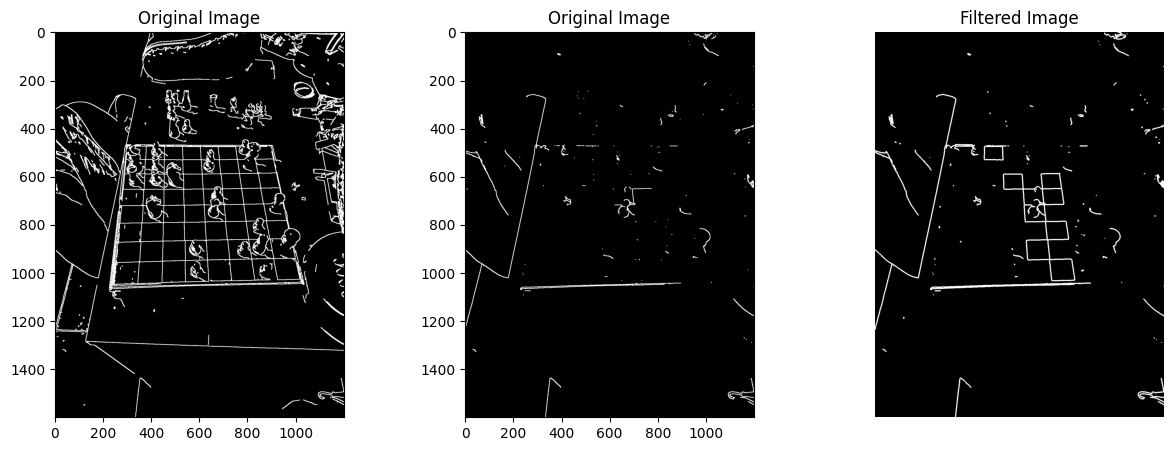

In [ ]:
import numpy as np
import numpy.linalg as la
import cv2


img = cv2.imread(image_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
canny_image = cv2.Canny(gray_image, thresh * 1.5, thresh * 0.75)

contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2BGR)

# Check if contour is a straight line based on curvature
def stra(contour, threshold=0.01):
    contour = np.squeeze(contour)  # Remove extra dimensions if present
    if len(contour.shape) < 2:
        return False # Empty array if contour is invalid

    x, y = contour[:, 0], contour[:, 1]
    dy = np.gradient(y, x)
    ddy = np.gradient(dy, x)
    curvature = np.abs(np.nanmean(ddy))
    return curvature < threshold

curved_contours = []
straight_contours = []
second_derivatives = []
for c in contours:
    m = stra(c)
    if m == False:
        curved_contours.append(c)
    else:
        straight_contours.append(c)

deleted_image = output_image.copy()
cv2.drawContours(deleted_image, curved_contours, -1, (0, 0, 0), 1)    
deleted_image = cv2.dilate(deleted_image, np.ones((3,3)))    

straight_image = np.zeros_like(deleted_image)
cv2.drawContours(straight_image, straight_contours, -1, (255, 255, 255), 3)            


output_image = cv2.dilate(output_image, np.ones((3,3)), iterations=1)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(deleted_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(cv2.cvtColor(straight_image, cv2.COLOR_BGR2RGB))
plt.axis('off')




curve False
straight True


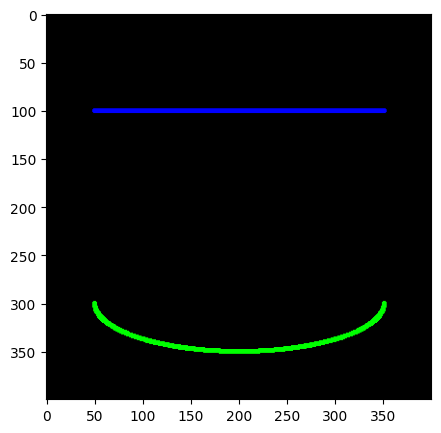

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate a test image with a straight line and a curved line
def generate_test_image():
    img = np.zeros((400, 400), dtype=np.uint8)
    # Draw a straight line
    cv2.line(img, (50, 100), (350, 100), 255, 2)
    # Draw a curved line
    cv2.ellipse(img, (200, 300), (150, 50), 0, 0, 180, 255, 2)
    return img

# Check if contour is a straight line based on curvature
def is_straight_line(contour, threshold=0.001):
    contour = np.squeeze(contour)  # Remove extra dimensions if present
    if len(contour.shape) < 2:
        return np.array([])  # Empty array if contour is invalid

    x, y = contour[:, 0], contour[:, 1]
    dy = np.gradient(y, x)
    ddy = np.gradient(dy, x)
    curvature = np.abs(np.nanmean(ddy))

    return curvature < threshold

# Main function
def main():
    # Generate test image
    img = generate_test_image()

    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Process each contour
    plt.figure(figsize=(10,5))

    output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(output, [contours[0]], -1, (0,255,0), 2)
    cv2.drawContours(output, [contours[1]], -1, (0,0,255), 2)
    plt.imshow(output, cmap="gray")

    print("curve", is_straight_line(contours[0]))
    print("straight", is_straight_line(contours[1]))
    # curvature = compute_second_derivative(contour)
    # straight = is_straight_line(contour)

    plt.show()

main()
